In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
import sklearn.linear_model as lm

In [2]:
data = pd.read_csv('insurance.csv')

In [3]:
data.describe()

,age,bmi,children,charges
count,1335.000000,1334.000000,1335.000000,1338.000000
mean,39.214232,30.665390,1.094382,13270.422265
std,14.051488,6.098268,1.206587,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Missing Values 

In [4]:
data[data.isnull().any(axis = 1)]

,age,sex,bmi,children,smoker,region,charges
48,60.0,female,NaN,0.0,no,southeast,12629.89670
74,44.0,male,27.400,NaN,no,southwest,7726.85400
89,55.0,female,NaN,0.0,no,northwest,11082.57720
126,19.0,female,NaN,0.0,yes,southwest,17081.08000
138,NaN,female,31.900,3.0,no,southeast,27322.73386
282,NaN,male,27.645,1.0,no,northeast,4237.12655
684,33.0,female,18.500,NaN,no,southwest,4766.02200
692,20.0,male,32.395,NaN,no,northwest,2362.22905
693,NaN,male,23.655,0.0,no,northwest,2352.96845
695,26.0,female,NaN,0.0,no,northwest,3201.24515


In [5]:
age_mode = data['age'].mode()[0]
data['age'].fillna(value = age_mode,inplace = True)

bmi_mean = data['bmi'].mean()
data['bmi'].fillna(value = bmi_mean,inplace = True)

children_mode = data['children'].mode()[0]
data['children'].fillna(value =children_mode ,inplace = True)


C:\Users\dumbr\AppData\Local\Temp\ipykernel_1436\1973107582.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(value = age_mode,inplace = True)
C:\Users\dumbr\AppData\Local\Temp\ipykernel_1436\1973107582.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [6]:
data[data.isnull().any(axis = 1)]

,age,sex,bmi,children,smoker,region,charges


In [7]:
data[74:]

,age,sex,bmi,children,smoker,region,charges
74,44.0,male,27.400,0.0,no,southwest,7726.85400
75,57.0,male,34.010,0.0,no,northwest,11356.66090
76,29.0,female,29.590,1.0,no,southeast,3947.41310
77,21.0,male,35.530,0.0,no,southeast,1532.46970
78,22.0,female,39.805,0.0,no,northeast,2755.02095
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,no,northwest,10600.54830
1334,18.0,female,31.920,0.0,no,northeast,2205.98080
1335,18.0,female,36.850,0.0,no,southeast,1629.83350
1336,21.0,female,25.800,0.0,no,southwest,2007.94500


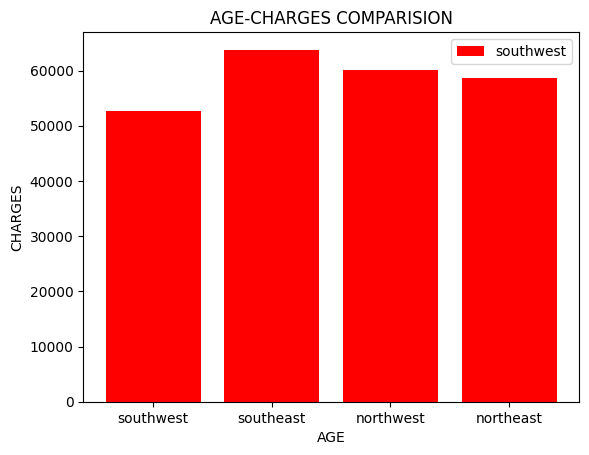

In [8]:
plt.bar(data.region,data.charges,color = ['red'])
plt.xlabel('AGE')
plt.ylabel('CHARGES')
plt.title("AGE-CHARGES COMPARISION")
plt.legend(data.region)

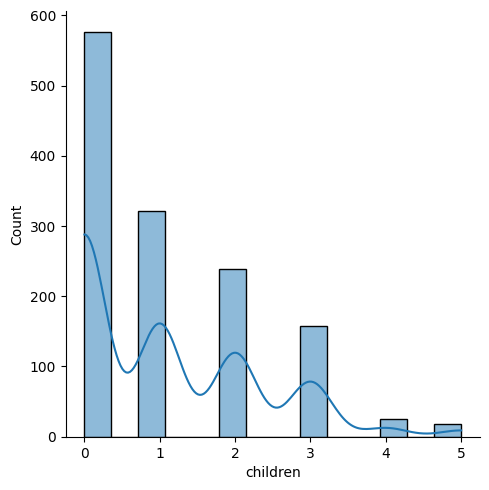

In [9]:
sns.displot(x = data.children,data = data,kde = True)

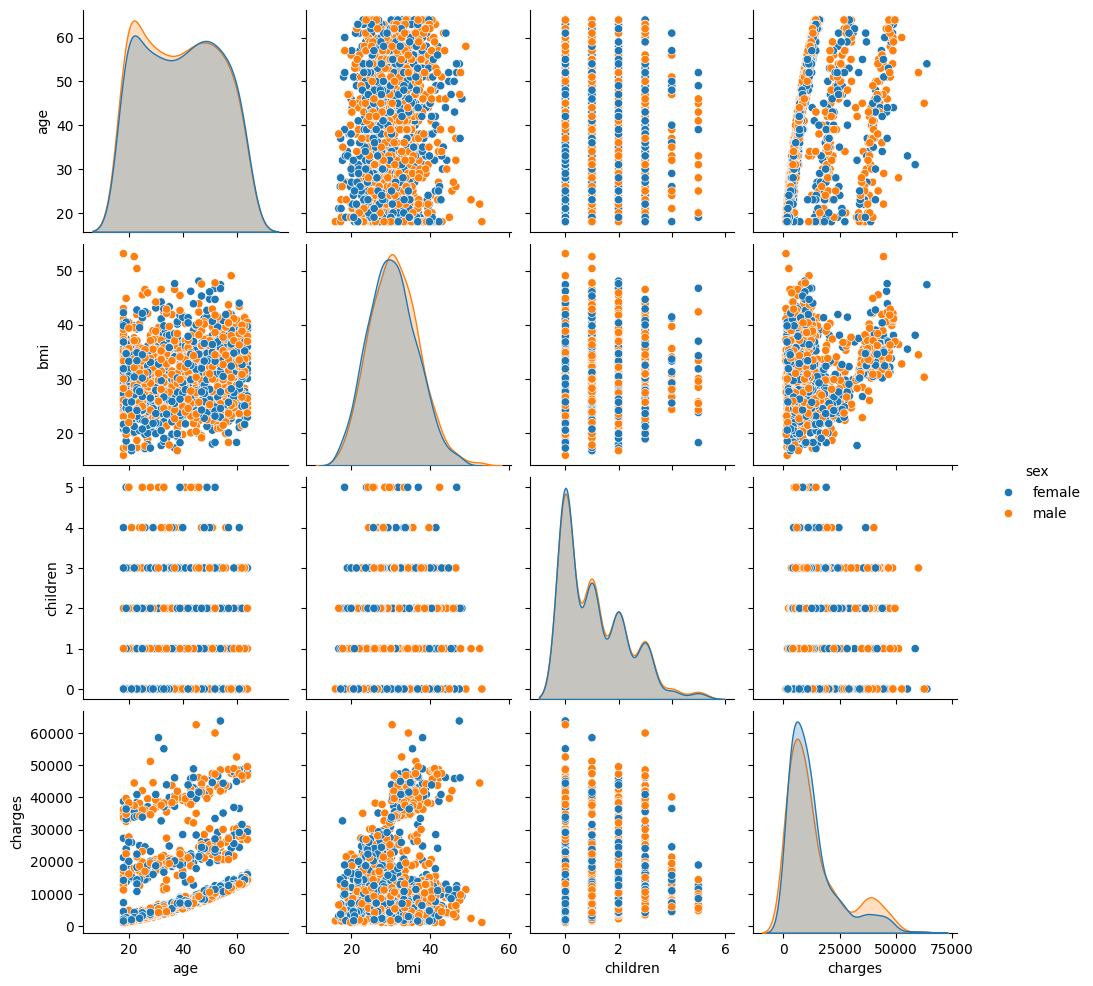

In [10]:
sns.pairplot(data,hue = 'sex')

([<matplotlib.patches.Wedge at 0x29bca3e38d0>,
 [Text(1.1, 0.0, ''),
  Text(1.075962358309037, 0.22870287165240302, ''),
  Text(0.5499999702695115, 0.9526279613277875, ''),
  Text(-0.5500000594609755, 0.9526279098330699, ''),
  Text(-1.004899951743044, -0.44741042342219545, ''),
  Text(0.7360438226180606, -0.8174591679012434, '')])

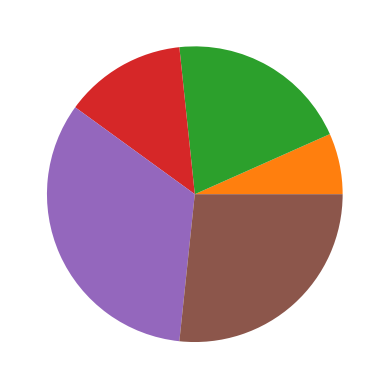

In [11]:
plt.pie(data.children.unique())

In [12]:
data.sex.replace('male',1,inplace = True)
data.sex.replace('female',0,inplace = True)

C:\Users\dumbr\AppData\Local\Temp\ipykernel_1436\3798517853.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.sex.replace('female',0,inplace = True)


In [13]:
data.smoker.replace('yes',1,  inplace = True)
data.smoker.replace('no',0,  inplace = True)

C:\Users\dumbr\AppData\Local\Temp\ipykernel_1436\3157520698.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.smoker.replace('yes',1,  inplace = True)
C:\Users\dumbr\AppData\Local\Temp\ipykernel_1436\3157520698.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [32]:
x= data['age']
y = data['charges']

In [33]:
x_train,x_test,y_train,y_test = tts(x,y,test_size = 0.2)

In [44]:
x1 = np.array(x_train).reshape(-1,1)
y1 = np.array(y_train).reshape(-1,1) 
x2 = np.array(x_test).reshape(-1,1)
y2 = np.array(y_test).reshape(-1,1) 


In [45]:
model = lm.LinearRegression()

In [46]:
model.fit(x1,y1)

LinearRegression()

In [48]:
predict = model.predict(x2)

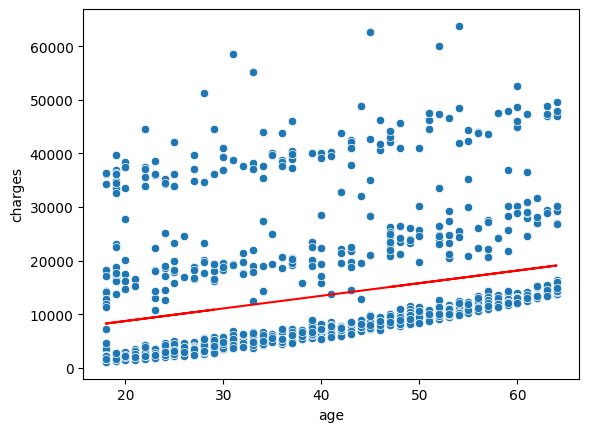

In [57]:
sns.scatterplot(x =x_train,y = y_train)
plt.plot(x2,predict,color = 'red')